# House Price Prediction

## Importing the libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing and Visualization ⚙️📊

### Importing the dataset

In [24]:
dataset = pd.read_excel('House Price Dataset.xlsx')
dataset.columns = dataset.iloc[0, :]
dataset.index = dataset.iloc[:, 0]
dataset = dataset.iloc[2:, 1:]
dataset.index.name = 'Id'

dataset = dataset.astype('float32')
dataset

,Total Land Size,Groos Area of unit,House Age,Land Value,Location Type,Building Type,Exist elevator,Distance from Malls,Distance to road,Number of bedrooms,Number of bathrooms,Garage,Garden Share,Level of Finishing,Preliminary estimated construction,Duration of construction,Price of the unit at the beginning,Population Trends in the city,Standard Level in the region,Quality of Schools,Quality of Services,Transportation,Interest Rate,Inflation Rate,Economic climate,CPI,Months in Market,Final Price
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Project 1,260.0,90.0,35.0,3500000.0,2.0,2.0,1.0,2.0,1.0,3.0,1.0,2.0,2.0,2.0,3700.0,14.0,5050.0,3.0,2.0,1.0,1.0,2.0,17.533333,13.766666,2.0,13.742000,10.0,676500.0
Project 2,200.0,90.0,20.0,2500000.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3500.0,14.0,4800.0,3.0,2.0,2.0,2.0,2.0,17.500000,14.566667,2.0,14.573000,8.0,631500.0
Project 3,250.0,110.0,18.0,4500000.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,2.0,3150.0,14.0,4600.0,3.0,2.0,2.0,2.0,2.0,19.700001,26.233334,2.0,26.233334,4.0,722000.0
Project 4,240.0,95.0,10.0,4500000.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,3400.0,8.0,4900.0,3.0,2.0,2.0,2.0,2.0,18.233334,12.966666,2.0,12.985000,5.0,663000.0
Project 5,220.0,100.0,15.0,3800000.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,1750.0,10.0,2700.0,1.0,3.0,2.0,2.0,1.0,11.566667,11.833333,3.0,11.821667,6.0,410000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Project 1103,185.0,75.0,13.0,2010000.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1400.0,11.0,2550.0,3.0,1.0,2.0,1.0,2.0,11.866667,11.200000,1.0,11.218333,9.0,700000.0
Project 1104,185.0,75.0,16.0,2010000.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1400.0,10.0,2550.0,3.0,1.0,2.0,1.0,2.0,11.866667,11.200000,3.0,11.218333,18.0,700000.0
Project 1105,205.0,90.0,24.0,3100000.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,1350.0,11.0,2500.0,3.0,1.0,2.0,1.0,2.0,11.433333,8.433333,3.0,8.437667,11.0,729500.0


### Taking care of missing data

In [25]:
dataset.isnull().sum()

0
Total Land Size                       0
Groos Area of unit                    0
House Age                             0
Land Value                            0
Location Type                         0
Building Type                         0
Exist elevator                        0
Distance from Malls                   0
Distance to road                      0
Number of bedrooms                    0
 Number of bathrooms                  0
 Garage                               0
Garden Share                          0
Level of Finishing                    0
Preliminary estimated construction    0
Duration of construction              0
Price of the unit at the beginning    0
Population Trends in the city         0
Standard Level in the region          0
Quality of Schools                    0
Quality of Services                   0
Transportation                        0
Interest Rate                         0
Inflation Rate                        0
Economic climate                      

### Summary statistics of dataset

In [26]:
dataset.describe()

,Total Land Size,Groos Area of unit,House Age,Land Value,Location Type,Building Type,Exist elevator,Distance from Malls,Distance to road,Number of bedrooms,Number of bathrooms,Garage,Garden Share,Level of Finishing,Preliminary estimated construction,Duration of construction,Price of the unit at the beginning,Population Trends in the city,Standard Level in the region,Quality of Schools,Quality of Services,Transportation,Interest Rate,Inflation Rate,Economic climate,CPI,Months in Market,Final Price
count,1107.000000,1107.000000,1107.000000,1107.0,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1107.000000,1.107000e+03
mean,222.149948,105.672989,16.869015,3374141.0,1.921409,1.372177,1.904246,1.468835,1.863595,2.715447,1.804878,1.587173,1.329720,2.062331,2992.457031,11.922313,4403.703613,2.463415,1.922312,1.411021,1.353207,1.924119,15.735882,14.883020,2.111111,14.881219,10.153568,7.722288e+05
std,39.031399,20.279999,7.110980,1228622.5,0.269223,0.483606,0.294388,0.499252,0.343374,0.605404,0.655934,0.492565,0.470326,0.761112,886.425110,3.017629,1142.490601,0.876283,0.745887,0.492242,0.478182,0.264927,2.623950,6.179861,0.658329,6.179555,4.074347,2.545429e+05
min,135.000000,65.000000,4.000000,500000.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,200.000000,5.000000,2200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.433333,4.600000,1.000000,4.624667,1.000000,1.990000e+05
25%,195.000000,90.000000,12.000000,2450000.0,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2100.000000,10.000000,3200.000000,1.000000,1.000000,1.000000,1.000000,2.000000,13.066667,11.833333,2.000000,11.821667,7.000000,6.275000e+05
50%,220.000000,100.000000,16.000000,3350000.0,2.000000,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,3350.000000,11.000000,4800.000000,3.000000,2.000000,1.000000,1.000000,2.000000,16.666666,13.766666,2.000000,13.742000,10.000000,7.620000e+05
75%,245.000000,120.000000,21.000000,4250000.0,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3750.000000,14.000000,5300.000000,3.000000,2.000000,2.000000,2.000000,2.000000,17.533333,15.133333,3.000000,15.100333,13.000000,9.082500e+05
max,340.000000,185.000000,62.000000,6500000.0,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,4.000000,2.000000,2.000000,3.000000,4500.000000,21.000000,6700.000000,3.000000,3.000000,2.000000,2.000000,2.000000,19.700001,32.166668,3.000000,32.153332,25.000000,2.127500e+06


In [27]:
pd.DataFrame(dataset.describe().iloc[1:, -1].astype('int32'))

,Final Price
mean,772228
std,254542
min,199000
25%,627500
50%,762000
75%,908250
max,2127500


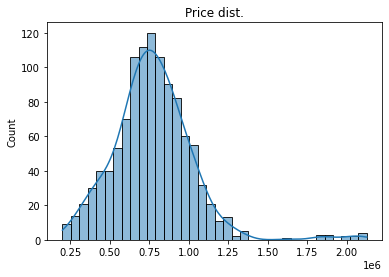

In [28]:
sns.histplot(dataset.iloc[:, -1].values, kde=True)
plt.title('Price dist.')
plt.show()

### Removing outliers

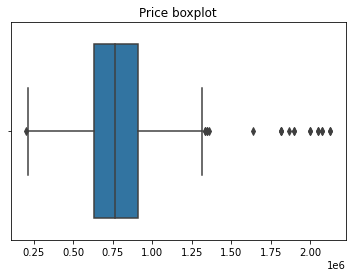

In [29]:
bp = sns.boxplot(x=dataset.iloc[:, -1].values)
plt.title('Price boxplot')
plt.show()

In [30]:
q1 = dataset['Final Price'].quantile(0.25)
q3 = dataset['Final Price'].quantile(0.75)
iqr = q3 - q1

smallest_non_outlier = q1 - 1.5*iqr
largest_non_outlier = q3 + 1.5*iqr

print(f'Smallest Non Outlier: {smallest_non_outlier}')
print(f'Largest Non Outlier: {largest_non_outlier}')

dataset = dataset[(dataset['Final Price'] >= smallest_non_outlier) & (dataset['Final Price'] <= largest_non_outlier)]

Smallest Non Outlier: 206375.0
Largest Non Outlier: 1329375.0


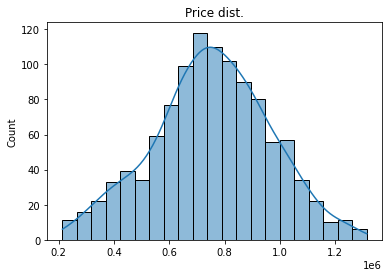

In [31]:
sns.histplot(dataset.iloc[:, -1].values, kde=True)
plt.title('Price dist.')
plt.show()

### Declare features matrix (X) and output vector (y)

In [32]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values.reshape(-1, 1)

### Saving the processed data

In [33]:
pd.DataFrame(X).to_csv('X.csv', index=False)
pd.DataFrame(y).to_csv('y.csv', index=False)